# Installing Dependencies

In [85]:
%pip install python-decouple --quiet
%pip install imouapi --quiet
%pip install matplotlib --quiet
%pip install numpy --quiet
%pip install pandas --quiet
%pip install opencv-python --quiet
%pip install pillow --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [86]:
from imouapi.api import ImouAPIClient
from imouapi.device import ImouDiscoverService
from imouapi.device import ImouDevice
from imouapi.device_entity import ImouCamera
from imouapi.const import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import json
from decouple import config
import time
import aiohttp
import io

# Loading Config

In [87]:
# Load the configuration from the config.json file
config_file = 'config.json'
config_data = {}
try:
    with open(config_file) as json_file:
        config_data = json.load(json_file)
        
except Exception as e:
    print(f'Error: {e}')
    
# Get the configuration data
IMOU_APP_ID = config('IMOU_APP_ID', default=config_data.get('IMOU_APP_ID', ''))
IMOU_APP_SECRET = config('IMOU_APP_SECRET', default=config_data.get('IMOU_APP_SECRET', ''))

# Creating Client Session

In [88]:
session = aiohttp.ClientSession()

api_client = ImouAPIClient(
    app_id=IMOU_APP_ID,
    app_secret=IMOU_APP_SECRET,
    session=session
)

# Discovering Devices

In [89]:
discover_service = ImouDiscoverService(
    api_client=api_client
)

In [90]:
discovered_devices = await discover_service.async_discover_devices()

In [95]:
discovered_device = ""
for disc_device in discovered_devices:
    print(f"{disc_device}: {discovered_devices[disc_device].get_device_id()}")
    discovered_device = disc_device

Front Door: 6K0720CPAZ972BE


In [92]:
device = ImouDevice(
    api_client=api_client,
    device_id=discovered_devices[discovered_device].get_device_id(),
)

# Camera Device

## Initializing Camera

In [ ]:
camera = ImouCamera(
    api_client=api_client,
    device_id=device.get_device_id(),
    device_name=device.get_name(),
    sensor_type="cameraSD",                 # cameraSD or cameraHD
    profile="SD",                           # SD or HD
)

## Getting Image From Camera

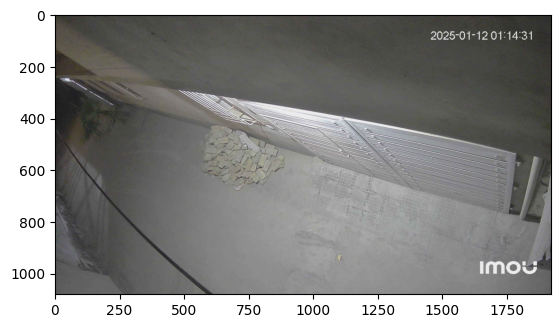

In [94]:
image = await camera.async_get_image()

image_stream = io.BytesIO(image)
image = Image.open(image_stream)

plt.imshow(image)
plt.show()

## Getting Video From Camera

In [99]:
video = await camera.async_get_stream_url()

# print(video)